## Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from wrangle import acquire, prepare, split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Acquiring data from local file

In [2]:
credit = acquire()

## Preparing the data

In [3]:
credit = prepare(credit)

## Splitting the data

In [4]:
train, validate, test = split(credit)

## Exploration

In [10]:
train

,churn,age,gender,dependents,education,marital_status,income,card_type,tenure,products_used,inactive_months_past_year,contacted_past_year,credit_limit,revolving_bal_tot,avg_open_to_buy,trans_amt_chng_q4_q1,tot_trans_amt,total_trans_ct,ct_chng_q4_q1,avg_card_utilization_ratio
7897,1,40,F,3,Doctorate,Married,Less than $40K,Blue,21,5,2,2,1728.0,0,1728.0,0.410,2191,38,0.357,0.000
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2304,0,41,M,3,Post-Graduate,Married,$60K - $80K,Blue,34,4,2,2,2624.0,1319,1305.0,0.768,4189,74,0.609,0.503
3192,0,39,M,2,Uneducated,Single,$40K - $60K,Blue,25,4,1,3,9121.0,1426,7695.0,0.666,4112,80,0.481,0.156
8491,0,49,F,3,Graduate,Single,$40K - $60K,Blue,32,1,3,3,5400.0,1426,3974.0,0.595,4643,80,0.702,0.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,0,56,M,2,Graduate,Single,$120K +,Blue,45,2,2,3,11714.0,898,10816.0,0.726,13956,122,0.718,0.077
3225,0,42,M,3,Post-Graduate,Married,$40K - $60K,Blue,29,3,3,4,2533.0,1126,1407.0,0.788,3436,74,0.574,0.445
5570,0,43,F,3,Graduate,Single,$40K - $60K,Blue,36,5,2,4,2594.0,1686,908.0,0.624,4503,67,0.811,0.650
8441,0,47,F,4,Graduate,Single,Less than $40K,Blue,34,1,3,2,5756.0,860,4896.0,0.708,5298,72,0.714,0.149


<AxesSubplot:>

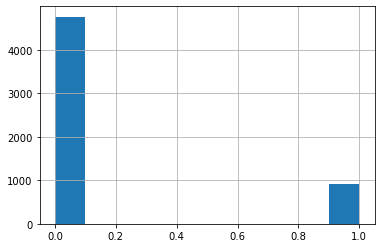

In [5]:
train.churn.hist()

<AxesSubplot:>

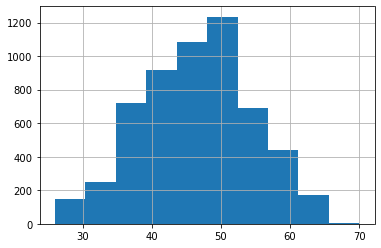

In [6]:
train.age.hist()

<AxesSubplot:>

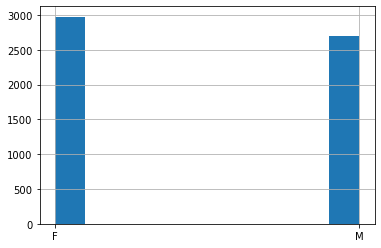

In [7]:
train.gender.hist()

<AxesSubplot:>

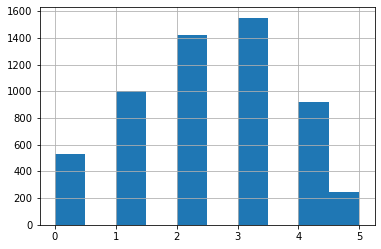

In [8]:
train.dependents.hist()

<AxesSubplot:>

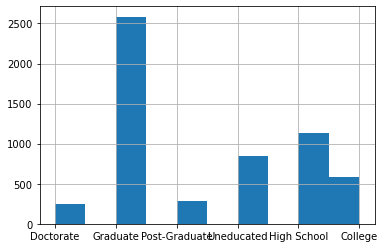

In [9]:
train.education.hist()